In [2]:
import pandas as pd
import numpy as np

# Generate mock customer data
np.random.seed(42)
num_customers = 2000

data = {
    'CustomerID': [f'CUST{1000+i}' for i in range(num_customers)],
    'Gender': np.random.choice(['Male', 'Female'], num_customers, p=[0.5, 0.5]),
    'SeniorCitizen': np.random.choice([0, 1], num_customers, p=[0.84, 0.16]),
    'Partner': np.random.choice(['Yes', 'No'], num_customers, p=[0.48, 0.52]),
    'Dependents': np.random.choice(['Yes', 'No'], num_customers, p=[0.3, 0.7]),
    'Tenure': np.random.randint(1, 73, num_customers),  # Months
    'PhoneService': np.random.choice(['Yes', 'No'], num_customers, p=[0.9, 0.1]),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], num_customers, p=[0.42, 0.48, 0.1]),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], num_customers, p=[0.34, 0.44, 0.22]),
    'OnlineSecurity': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.28, 0.50, 0.22]),
    'OnlineBackup': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.34, 0.44, 0.22]),
    'DeviceProtection': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.34, 0.44, 0.22]),
    'TechSupport': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.29, 0.49, 0.22]),
    'StreamingTV': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.38, 0.40, 0.22]),
    'StreamingMovies': np.random.choice(['Yes', 'No', 'No internet service'], num_customers, p=[0.39, 0.39, 0.22]),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], num_customers, p=[0.55, 0.24, 0.21]),
    'PaperlessBilling': np.random.choice(['Yes', 'No'], num_customers, p=[0.59, 0.41]),
    'PaymentMethod': np.random.choice(
        ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'],
        num_customers, p=[0.34, 0.23, 0.22, 0.21]),
    'MonthlyCharges': np.random.normal(loc=65, scale=30, size=num_customers).clip(18, 120).round(2),
}

df_customers = pd.DataFrame(data)

# Generate TotalCharges based on Tenure and MonthlyCharges with some noise
df_customers['TotalCharges'] = (df_customers['Tenure'] * df_customers['MonthlyCharges'] *
                                np.random.uniform(0.95, 1.05, num_customers)).round(2)

# Set TotalCharges to MonthlyCharges for new customers with tenure = 1
df_customers.loc[df_customers['Tenure'] == 1, 'TotalCharges'] = df_customers['MonthlyCharges']

# Randomly set some TotalCharges to NaN for realism (new/short-tenure customers)
low_tenure_indices = df_customers[df_customers['Tenure'] < 3].sample(frac=0.01, random_state=42).index
df_customers.loc[low_tenure_indices, 'TotalCharges'] = np.nan

# Simulate Churn (more likely for month-to-month, higher charges, lower tenure)
churn_probability = (
    0.1
    + 0.15 * (df_customers['Contract'] == 'Month-to-month')
    + 0.1 * (df_customers['InternetService'] == 'Fiber optic')
    + 0.001 * (df_customers['MonthlyCharges'] - 65)
    - 0.002 * (df_customers['Tenure'] - 36)
    + 0.1 * (df_customers['OnlineSecurity'] == 'No')
    + 0.1 * (df_customers['TechSupport'] == 'No')
)

churn_probability = np.clip(churn_probability, 0.01, 0.99)
df_customers['Churn'] = np.random.binomial(1, churn_probability, num_customers).astype(str)
df_customers['Churn'] = df_customers['Churn'].replace({'1': 'Yes', '0': 'No'})

# Replace "No phone service" and "No internet service" for consistency
for col in ['MultipleLines']:
    df_customers[col] = df_customers.apply(lambda row: 'No' if row['PhoneService'] == 'No' else row[col], axis=1)

for col in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    df_customers[col] = df_customers.apply(lambda row: 'No' if row['InternetService'] == 'No' else row[col], axis=1)

# Done! You now have a realistic synthetic telecom customer churn dataset
print(df_customers.head())


  CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0   CUST1000    Male              0      No         No      30          Yes   
1   CUST1001  Female              0      No        Yes      11          Yes   
2   CUST1002  Female              1      No         No      17           No   
3   CUST1003  Female              0     Yes         No      26          Yes   
4   CUST1004    Male              0     Yes        Yes      23          Yes   

  MultipleLines InternetService       OnlineSecurity  ... DeviceProtection  \
0           Yes              No                   No  ...               No   
1           Yes     Fiber optic  No internet service  ...               No   
2            No     Fiber optic                   No  ...               No   
3            No              No                   No  ...               No   
4            No     Fiber optic  No internet service  ...               No   

           TechSupport StreamingTV      StreamingMovies 

In [3]:
# Save to CSV
df_customers.to_csv('telecom_churn_mock_data.csv', index=False)
print("Mock telecom churn data generated: telecom_churn_mock_data.csv")
print(df_customers.head())
print(f"\nChurn distribution:\n{df_customers['Churn'].value_counts(normalize=True)}")

Mock telecom churn data generated: telecom_churn_mock_data.csv
  CustomerID  Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
0   CUST1000    Male              0      No         No      30          Yes   
1   CUST1001  Female              0      No        Yes      11          Yes   
2   CUST1002  Female              1      No         No      17           No   
3   CUST1003  Female              0     Yes         No      26          Yes   
4   CUST1004    Male              0     Yes        Yes      23          Yes   

  MultipleLines InternetService       OnlineSecurity  ... DeviceProtection  \
0           Yes              No                   No  ...               No   
1           Yes     Fiber optic  No internet service  ...               No   
2            No     Fiber optic                   No  ...               No   
3            No              No                   No  ...               No   
4            No     Fiber optic  No internet service  ...               

In [4]:
!ls -lh telecom_churn_mock_data.csv


-rw-r--r-- 1 root root 259K May 23 09:23 telecom_churn_mock_data.csv


In [5]:
from google.colab import files
files.download('telecom_churn_mock_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Importing Dependencies and Data**

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [38]:
data = pd.read_csv("/content/telecom_churn_mock_data.csv")
data.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST1000,Male,0,No,No,30,Yes,Yes,No,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),69.55,2047.01,Yes
1,CUST1001,Female,0,No,Yes,11,Yes,Yes,Fiber optic,No internet service,...,No,No internet service,No,No internet service,Month-to-month,Yes,Electronic check,48.08,522.42,Yes
2,CUST1002,Female,1,No,No,17,No,No,Fiber optic,No,...,No,No,Yes,No,Two year,No,Electronic check,36.56,610.07,No
3,CUST1003,Female,0,Yes,No,26,Yes,No,No,No,...,No,No,No,No,One year,Yes,Bank transfer (automatic),79.72,2159.26,No
4,CUST1004,Male,0,Yes,Yes,23,Yes,No,Fiber optic,No internet service,...,No,Yes,No,Yes,Month-to-month,Yes,Mailed check,70.42,1672.56,Yes


**Exploratory Data Analysis**

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        2000 non-null   object 
 1   Gender            2000 non-null   object 
 2   SeniorCitizen     2000 non-null   int64  
 3   Partner           2000 non-null   object 
 4   Dependents        2000 non-null   object 
 5   Tenure            2000 non-null   int64  
 6   PhoneService      2000 non-null   object 
 7   MultipleLines     2000 non-null   object 
 8   InternetService   2000 non-null   object 
 9   OnlineSecurity    2000 non-null   object 
 10  OnlineBackup      2000 non-null   object 
 11  DeviceProtection  2000 non-null   object 
 12  TechSupport       2000 non-null   object 
 13  StreamingTV       2000 non-null   object 
 14  StreamingMovies   2000 non-null   object 
 15  Contract          2000 non-null   object 
 16  PaperlessBilling  2000 non-null   object 


In [40]:
data.shape

(2000, 21)

In [41]:
data.duplicated().sum()

np.int64(0)

In [42]:
data.isnull().sum()

,0
CustomerID,0
Gender,0
SeniorCitizen,0
Partner,0
Dependents,0
Tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


There is no missing value so we dont need any imputation

**Categorical Features vs Churn**

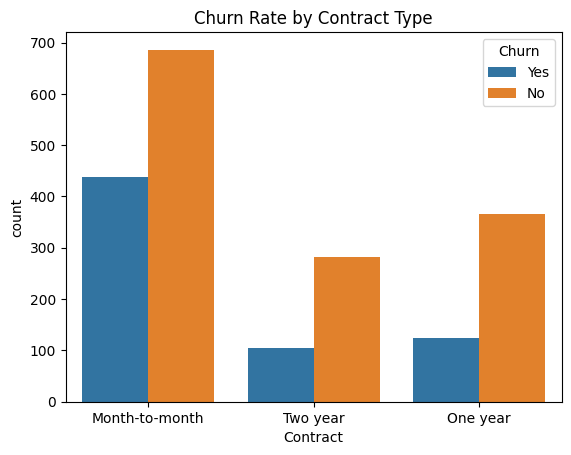

In [43]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn Rate by Contract Type')
plt.show()

In [44]:
pd.crosstab(df_customers['Contract'], df_customers['Churn'], normalize='index') * 100

Churn,1,2
Contract,,
1,38.913624,61.086376
2,25.510204,74.489796
3,27.131783,72.868217


From here we can see that highest churn rate is due to **Month to Month contract type**.

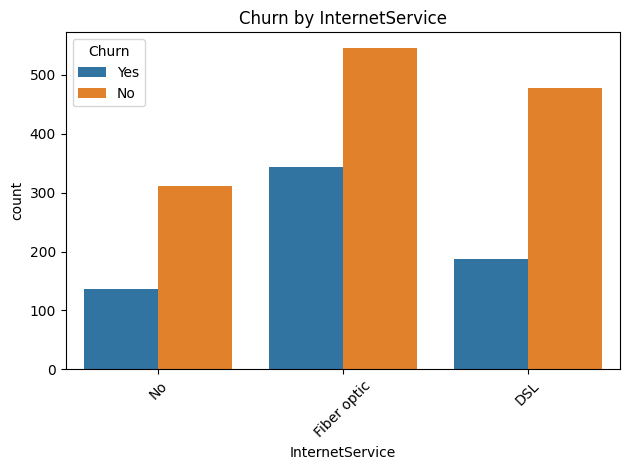

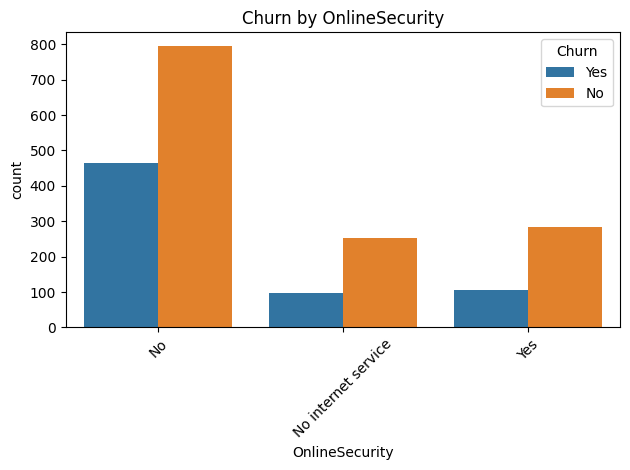

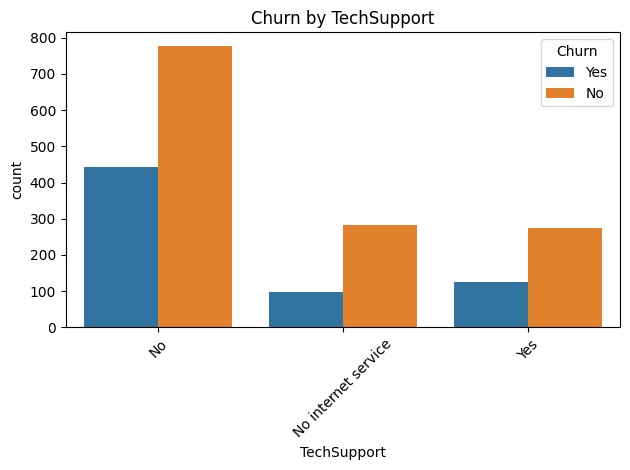

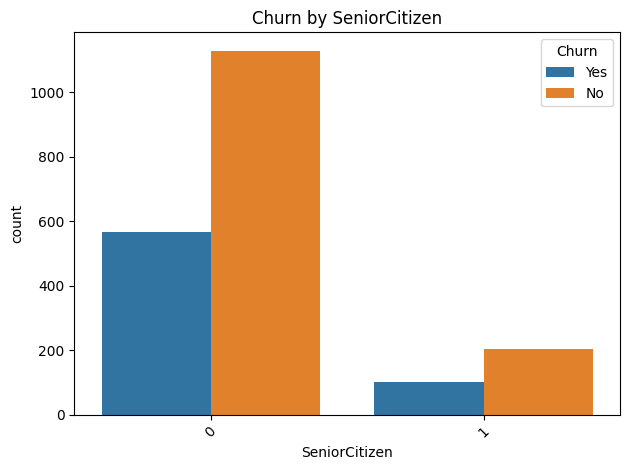

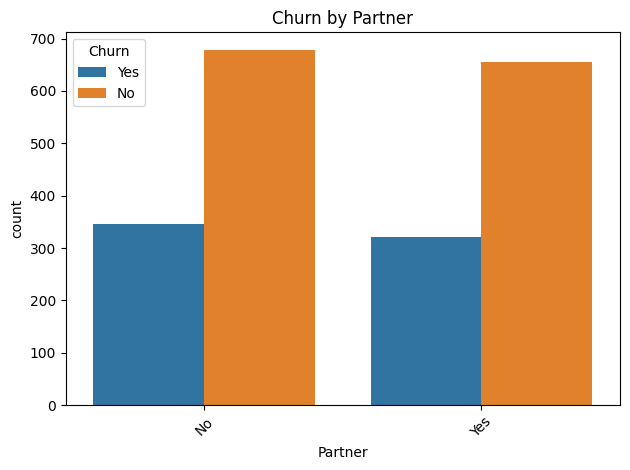

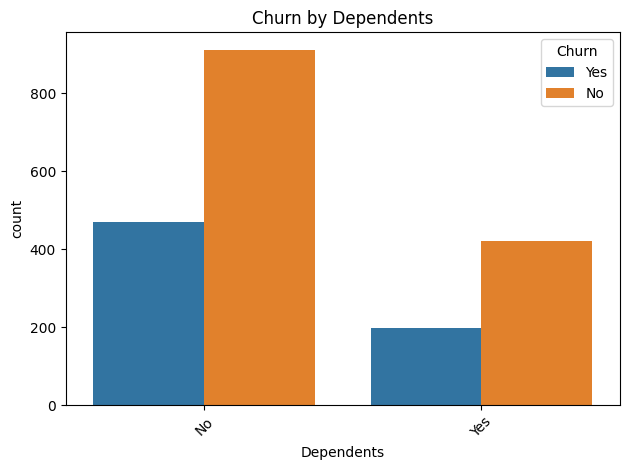

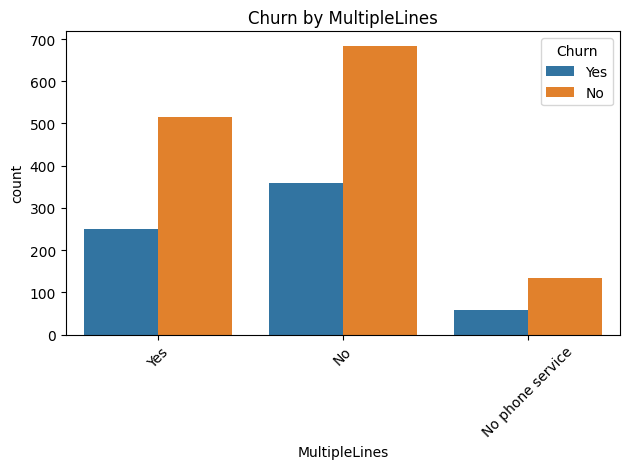

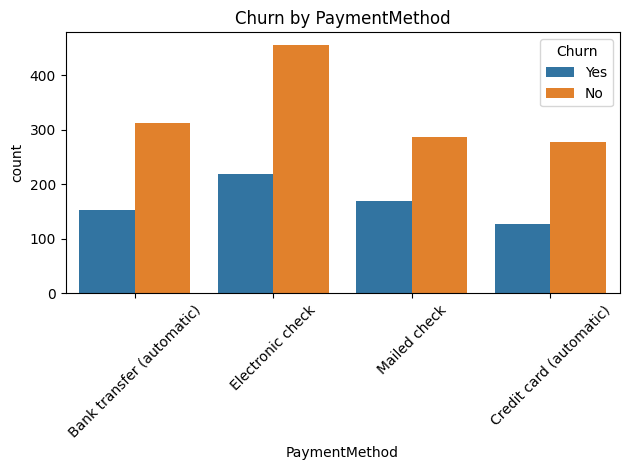

In [45]:
categorical_cols = ['InternetService', 'OnlineSecurity', 'TechSupport',
                    'SeniorCitizen', 'Partner', 'Dependents',
                    'MultipleLines', 'PaymentMethod']

for col in categorical_cols:
    sns.countplot(x=col, hue='Churn', data=data)
    plt.title(f'Churn by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Insights**  

Customers using Fiber optic internet have the highest churn rate.

Churn is highest among customers without Online Security.

Customers lacking Tech Support show a higher churn rate.

Non-senior citizens (SeniorCitizen = 0) have a higher churn rate.

Customers without partners churn more than those with partners.

Churn is higher for customers without dependents.

Customers without multiple lines experience the highest churn.

Mailed check and Electronic check payment methods have the highest churn rates.

**Numerical Data vs Churn**

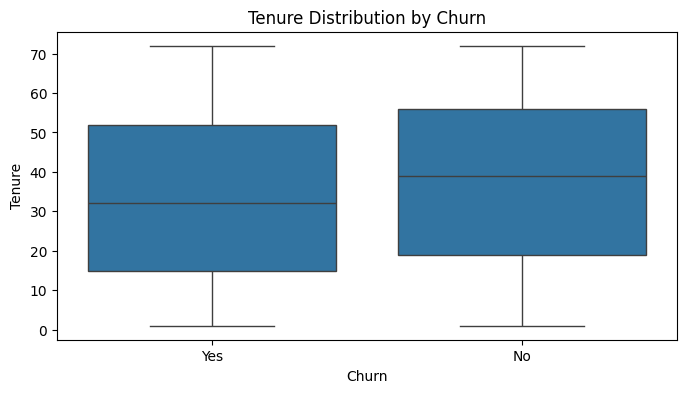

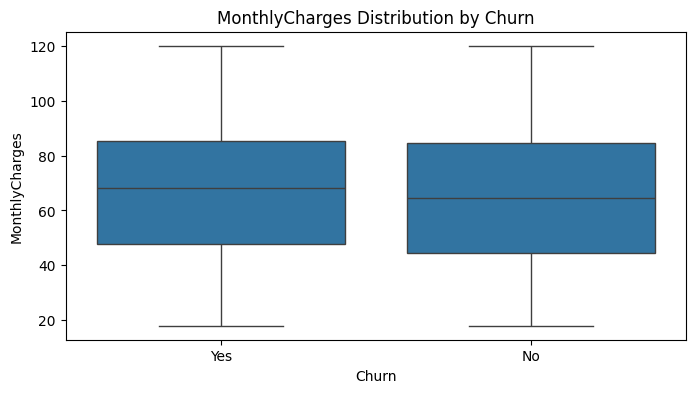

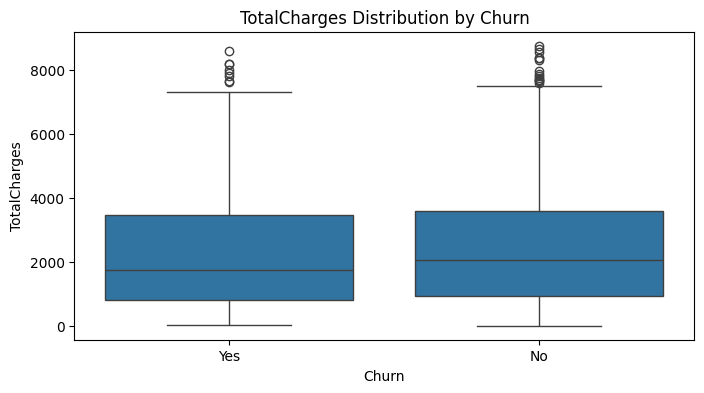

In [46]:
numerical_cols = ['Tenure', 'MonthlyCharges', 'TotalCharges']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Churn', y=col, data=data)
    plt.title(f'{col} Distribution by Churn')
    plt.show()

**Insights**  

Customers who churn tend to have lower tenure, meaning they leave earlier.

Monthly charges are generally higher for customers who churn.

Total charges tend to be lower for churned customers, reflecting their shorter tenure and early exit.


**NOTE**  
Outliers in TotalCharges are retained because they may represent important customer behavior patterns. Modern classification algorithms, such as ensemble methods, are robust enough to handle these outliers effectively without needing removal. Therefore, outlier removal is avoided to preserve valuable information for accurate churn prediction.

In [63]:
# Binary columns encoding: Yes/No → 1/2 and No IS -> 3
binary_map = {'Yes': 1, 'No': 2,'No internet service': 3}

binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'Churn', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]

for col in binary_cols:
    df_customers[col].replace(binary_map, inplace=True)

# Gender encoding: Male → 1, Female → 2
df_customers['Gender'].replace({'Male': 1, 'Female': 2}, inplace=True)

# InternetService encoding: DSL → 1, Fiber optic → 2, No → 3
df_customers['InternetService'].replace({'DSL': 1, 'Fiber optic': 2, 'No': 3}, inplace=True)

# Contract encoding: Month-to-month → 1, One year → 2, Two year → 3
df_customers['Contract'].replace({'Month-to-month': 1, 'One year': 2, 'Two year': 3}, inplace=True)

# MultipleLines encoding
df_customers['MultipleLines'].replace({'No phone service': 0, 'No': 1, 'Yes': 2}, inplace=True)

# PaymentMethod encoding: Manual way
df_customers['PaymentMethod'].replace({
    'Electronic check': 1,
    'Mailed check': 2,
    'Bank transfer (automatic)': 3,
    'Credit card (automatic)': 4
}, inplace=True)


<ipython-input-63-e8b0b3bb28c6>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customers[col].replace(binary_map, inplace=True)
<ipython-input-63-e8b0b3bb28c6>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [64]:
df_customers.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_encoded,TenureInYears,AvgMonthlyCharge
0,CUST1000,1,0,2,2,30,1,1,3,2,...,2,1,2,3,69.55,2047.01,1,1,2.50,68.23
1,CUST1001,2,0,2,1,11,1,1,2,3,...,3,1,1,1,48.08,522.42,1,1,0.92,47.49
2,CUST1002,2,1,2,2,17,2,2,2,2,...,2,3,2,1,36.56,610.07,2,2,1.42,35.89
3,CUST1003,2,0,1,2,26,1,2,3,2,...,2,2,1,3,79.72,2159.26,2,2,2.17,83.05
4,CUST1004,1,0,1,1,23,1,2,2,3,...,1,1,1,2,70.42,1672.56,1,1,1.92,72.72


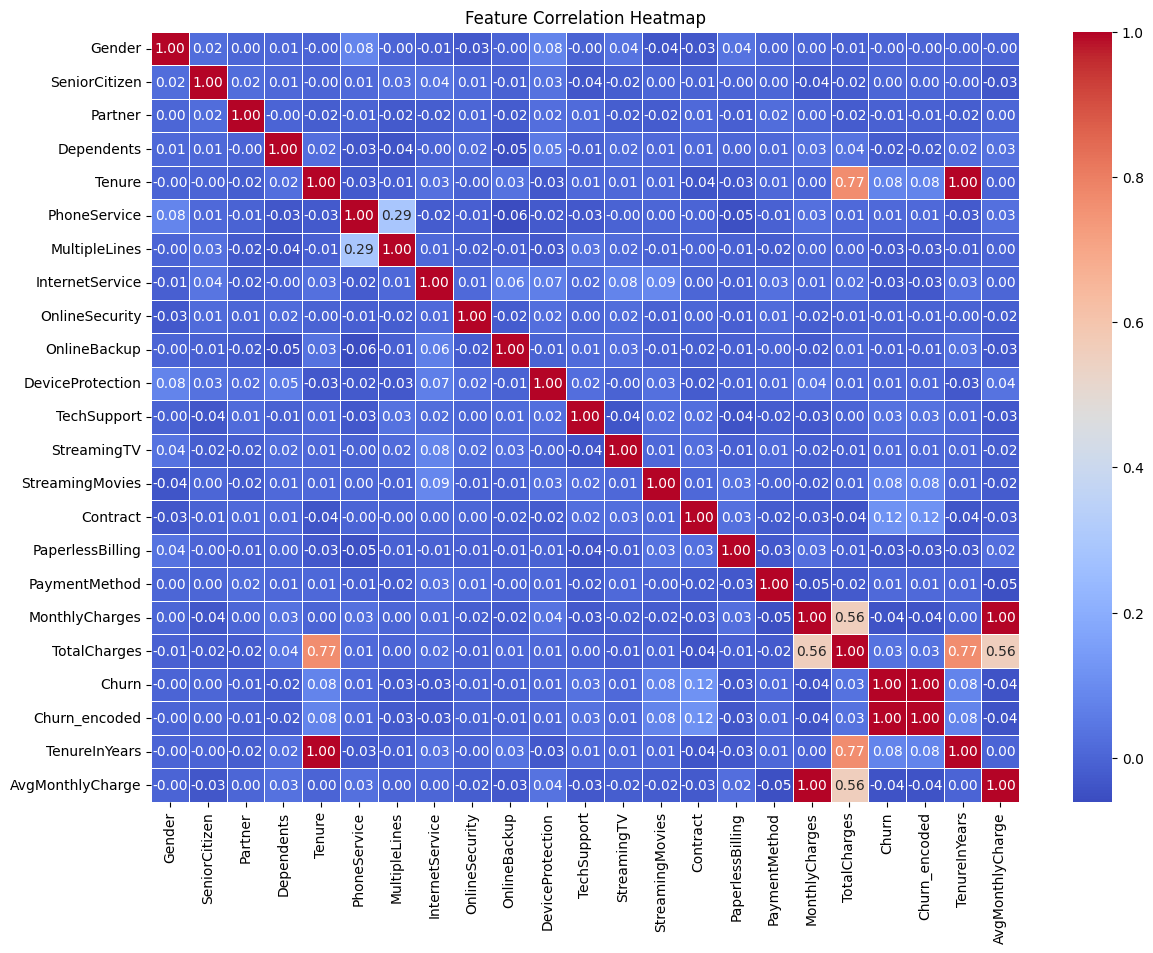

In [65]:
# Convert 'Churn' to numeric temporarily for correlation
df_customers['Churn_encoded'] = df_customers['Churn'].replace({'Yes': 1, 'No': 0})

# Compute correlation matrix
corr_matrix = df_customers.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

**Feature Engineering**

In [66]:
# Tenure in years (assuming 12 months per year)
df_customers['TenureInYears'] = (df_customers['Tenure'] / 12).round(2)

# Average monthly charge over tenure (avoiding division by zero)
df_customers['AvgMonthlyCharge'] = (df_customers['TotalCharges'] / df_customers['Tenure']).round(2)

# For rows where Tenure is 0 (which should not happen here), fill AvgMonthlyCharge with MonthlyCharges
df_customers['AvgMonthlyCharge'].fillna(df_customers['MonthlyCharges'], inplace=True)

<ipython-input-66-bac231fbee44>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_customers['AvgMonthlyCharge'].fillna(df_customers['MonthlyCharges'], inplace=True)


In [67]:
df_customers.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_encoded,TenureInYears,AvgMonthlyCharge
0,CUST1000,1,0,2,2,30,1,1,3,2,...,2,1,2,3,69.55,2047.01,1,1,2.50,68.23
1,CUST1001,2,0,2,1,11,1,1,2,3,...,3,1,1,1,48.08,522.42,1,1,0.92,47.49
2,CUST1002,2,1,2,2,17,2,2,2,2,...,2,3,2,1,36.56,610.07,2,2,1.42,35.89
3,CUST1003,2,0,1,2,26,1,2,3,2,...,2,2,1,3,79.72,2159.26,2,2,2.17,83.05
4,CUST1004,1,0,1,1,23,1,2,2,3,...,1,1,1,2,70.42,1672.56,1,1,1.92,72.72


In [68]:
# List of columns to drop
drop_cols = ['CustomerID', 'Churn']  # Keep churn encoded as target

# Select features by excluding drop_cols
feature_cols = [col for col in df_customers.columns if col not in drop_cols]

# Final features dataframe
X = df_customers[feature_cols]

# Target variable
y = df_customers['Churn_encoded']


In [69]:
print(X)
print("-----------------------------------------------------------------------------------------------------------------------------")
print(y)

      Gender  SeniorCitizen  Partner  Dependents  Tenure  PhoneService  \
0          1              0        2           2      30             1   
1          2              0        2           1      11             1   
2          2              1        2           2      17             2   
3          2              0        1           2      26             1   
4          1              0        1           1      23             1   
...      ...            ...      ...         ...     ...           ...   
1995       2              0        2           1      72             1   
1996       2              0        2           1      34             1   
1997       1              0        2           2      57             1   
1998       1              0        2           2      19             1   
1999       1              0        1           1      71             2   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0                 1                3

In [70]:
# Assuming y contains values 1 and 2
y = y.replace({1: 0, 2: 1})  # Remap so classes are 0 and 1

**Model Training**

In [71]:
# Importing Dependencies
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% for testing
    random_state=42,      # for reproducibility
    stratify=y            # keeps class distribution balanced
)

In [73]:
# ------------------------------------------------- XGB CLASSIFIER -------------------------------------------#

In [74]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]
}


In [75]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',    # You can change scoring metric if needed
    cv=5,
    verbose=1,
    n_jobs=-1
)

In [76]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:42:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 1],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 1]},
             scoring='accuracy', verbose=1)

In [77]:
print("Best parameters found: ", grid_search.best_params_)
print(f"Best accuracy: {grid_search.best_score_:.4f}")


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Best accuracy: 1.0000


In [78]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

In [79]:
# After running GridSearchCV and fitting it, get the best model
best_model = grid_search.best_estimator_

# Use best model to predict on test data
y_pred = best_model.predict(X_test)

# Calculate scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy after tuning: {accuracy:.4f}")
print(f"Precision after tuning: {precision:.4f}")
print(f"Recall after tuning: {recall:.4f}")
print(f"F1 Score after tuning: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy after tuning: 1.0000
Precision after tuning: 1.0000
Recall after tuning: 1.0000
F1 Score after tuning: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       267

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400


Confusion Matrix:
[[133   0]
 [  0 267]]


In [91]:
#------------------------------------------------- Random Forest Classifier ---------------------------------------------------#

In [92]:
# Initialize Random Forest with basic params
rf_model = RandomForestClassifier(random_state=42)

# Train on training data
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [93]:
# Predict on test set
rf_predictions = rf_model.predict(X_test)

# Evaluate
print("Random Forest Classifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"Precision: {precision_score(y_test, rf_predictions):.4f}")
print(f"Recall: {recall_score(y_test, rf_predictions):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_predictions):.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
[[133   0]
 [  0 267]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       133
           1       1.00      1.00      1.00       267

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [94]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best params:", grid_search_rf.best_params_)

best_rf_model = grid_search_rf.best_estimator_

# Predict and evaluate using best_rf_model
rf_pred_best = best_rf_model.predict(X_test)
print(f"Accuracy after tuning: {accuracy_score(y_test, rf_pred_best):.4f}")

Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy after tuning: 1.0000


In [95]:
print(df_customers['Churn'].value_counts(normalize=True))


Churn
2    0.6665
1    0.3335
Name: proportion, dtype: float64


========================================= THE END =====================================